<a href="https://colab.research.google.com/github/aryaanoushka/InstaMetric/blob/main/InstagramReachAnalysisUsingPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Instagram Reach Analysis Using Python:***

## Let us start with the task of analyzing the reach of an instagram account by importing the necessary Python libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

# Importing the dataset :***Instagram***

In [ ]:
data=pd.read_csv("Instametric.csv", encoding = 'latin1' )
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

### Let's check for any null values in this dataset

In [ ]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

### It doesn't have any null values

In [ ]:
#If any null value was found
#data=data.dropna()

### Taking a look at the insights of the columns to understand the data type of all the columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


# Analyzing the reach of  the Instagram posts

### Looking at the distribution of impressions it has received from home

<ipython-input-57-3d07cc7c6906>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




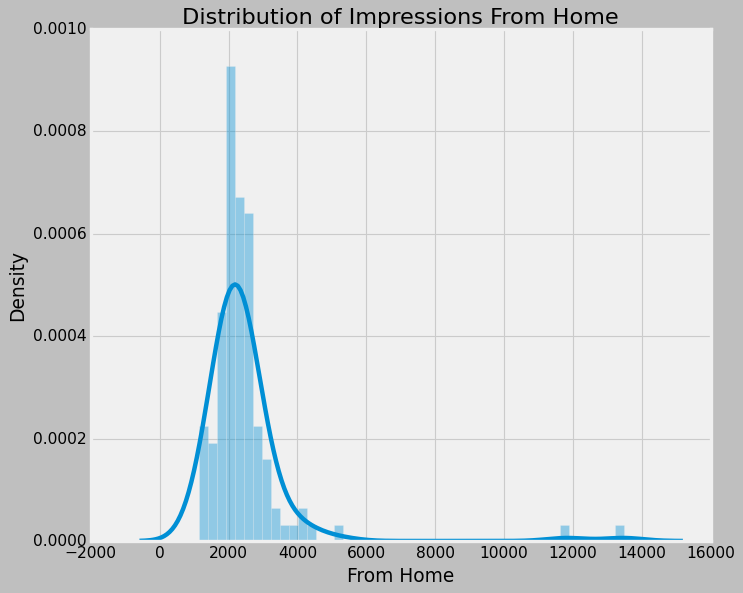

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

### The impressions from the home section on Instagram shows how much the posts reach one's followers. Looking at the impressions from home, I can say it’s hard to reach all the  followers daily.

### Now let’s have a look at the distribution of the impressions received from hashtags:

<ipython-input-58-977c6bd02186>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




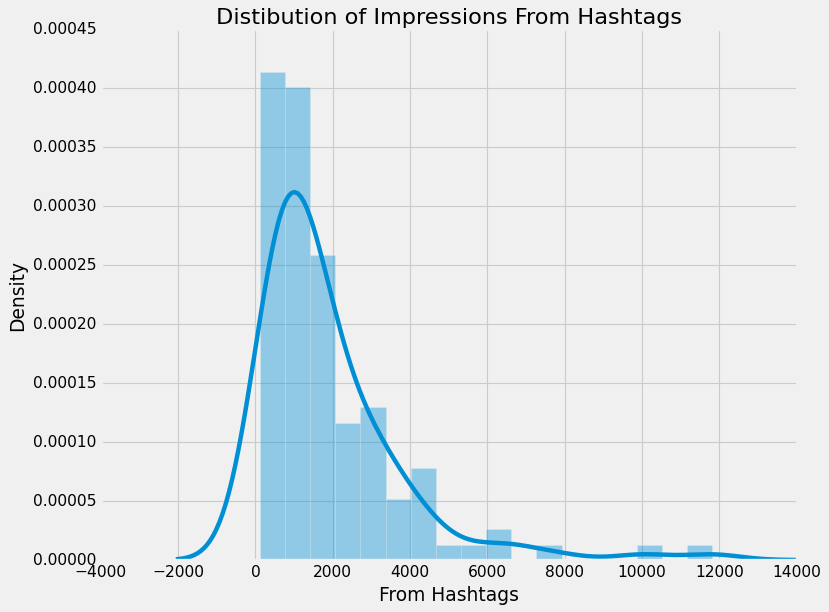

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Distibution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

### Hashtags are tools we use to categorize our posts on Instagram so that we can reach more people based on the kind of content we are creating. Looking at hashtag impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags.

Now we will have a look at the distribution of impressions received from the explore section of Instagram:

<ipython-input-59-a549ec5356ba>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




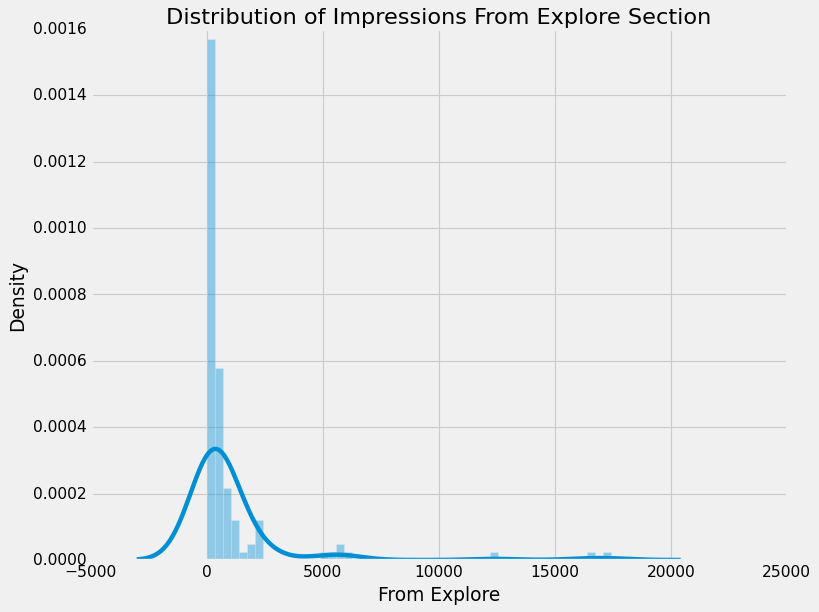

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Explore Section")
sns.distplot(data['From Explore'])
plt.show()

### The explore section of Instagram is the recommendation system of Instagram. It recommends posts to the users based on their preferences and interests.

### By looking at the impressions received from the explore section, we can say that Instagram doesn't recommend our posts much to the users. Some posts have received a good reach from the explore section, but it’s still very low compared to the reach receive from hashtags.

### Now we will have a look at the percentage of impressions we got from various sources on Instagram:

In [ ]:
home=data["From Home"].sum()
hashtags=data["From Hashtags"].sum()
explore=data["From Explore"].sum()
other=data["From Other"].sum()

labels=['From Home','From Hashtags','From Explore','Other']
values=[home,hashtags,explore,other]

fig=px.pie(data,values=values,names=labels,title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

### So the above donut plot shows that 44.1 per cent of the reach is from my followers, 33.6 per cent is from hashtags, 19.12 per cent is from the explore section, and 3.05 per cent is from other sources.

# Analyzing Content

### Now we'll analyze the content of the Instagram posts. The dataset has two columns, namely caption and hashtags, which will help us understand the kind of content posted on Instagram.

### Let’s create a wordcloud of the caption column to look at the most used words in the caption of my Instagram posts:

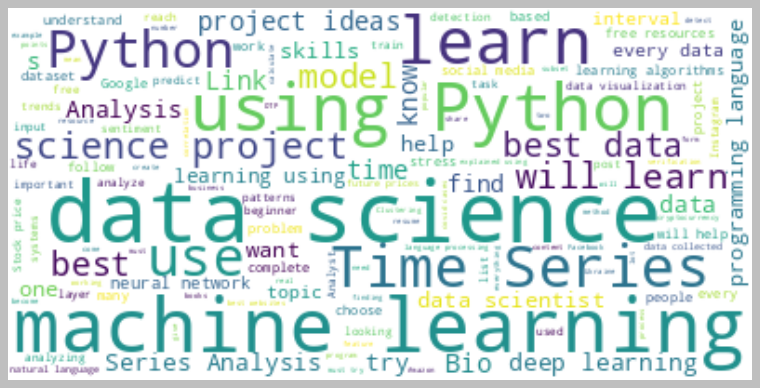

In [ ]:
text=" ".join(i for i in data.Caption)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

### Now let’s create a wordcloud of the hashtags column to look at the most used hashtags in the Instagram posts:

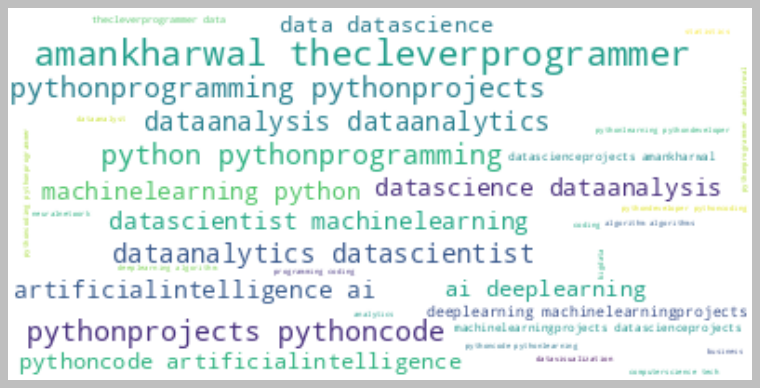

In [ ]:
text=" ".join(i for i in data.Hashtags)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# Analyzing Relationships

### Analyzing relationships helps us to find the most important factors of our Instagram reach. It will also help us in understanding how the Instagram algorithm works.

### Having a look at the relationship between the number of likes and the number of impressions on the Instagram posts:

In [ ]:
figure=px.scatter(data_frame=data,x="Impressions",y="Likes",size="Likes",trendline="ols",title="Relationship Between Likes and Impressions")
figure.show()

### There is a linear relationship between the number of likes and the reach we got on Instagram.

### Now let’s see the relationship between the number of comments and the number of impressions on the Instagram posts:

In [ ]:
figure=px.scatter(data_frame=data,x="Impressions",y="Comments",size="Comments",trendline="ols",title="Relationship Between Comments and TotalImpressions")
figure.show()

### It looks like the number of comments we get on a post doesn’t affect its reach

### Now let’s have a look at the relationship between the number of shares and the number of impressions:

In [ ]:
figure=px.scatter(data_frame=data, x="Impressions",y="Shares",size="Shares",trendline="ols",title="Relationship Between Shares and Total Impressions")
figure.show()

### A more number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do.

### Now let’s have a look at the relationship between the number of saves and the number of impressions:

In [ ]:
figure=px.scatter(data_frame=data, x="Impressions",y="Saves",size="Saves",trendline="ols",title="Relationship Between Saves and Total Impressions")
figure.show()

### There is a linear relationship between the number of times our post is saved and the reach of our Instagram post

### Now let’s have a look at the correlation of all the columns with the Impressions column:

In [ ]:
correlation=data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


<ipython-input-67-53cf506fee56>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### So we can say that more likes and saves will help you get more reach on Instagram. The higher number of shares will also help you get more reach, but a low number of shares will not affect your reach either.

# Analyzing Conversion Rate

### In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post. The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100.

### Now let’s have a look at the conversation rate of our Instagram account:

In [ ]:
conversion_rate=(data["Follows"].sum()/data["Profile Visits"].sum())*100
print(conversion_rate)

41.00265604249668


### So the conversation rate of our Instagram account is 41% which sounds like a very good conversation rate.

### Let’s have a look at the relationship between the total profile visits and the number of followers gained from all profile visits:

In [ ]:
figure=px.scatter(data_frame=data,x="Profile Visits",y="Follows",size="Follows",trendline="ols",title="Relationship Between Profile Visits and Followers Gained")
figure.show()

### The relationship between profile visits and followers gained is also linear.